<a href="https://colab.research.google.com/github/shahadatrucse/Machine-Learning/blob/main/VGG_16_model_for_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
DIRECTORY = '/content/drive/MyDrive/Dataset/DataSet'
CLASS_NAME = ['calculator','smartPhone']

IMG_SIZE = 320

data = []

for category in CLASS_NAME:
    folder = os.path.join(DIRECTORY, category)
    label = CLASS_NAME.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

random.shuffle(data)

train_images = []
train_labels = []

test_images = []
test_labels = []


BREAK_POINT = int(len(data)*0.80);
iterator=0
for img, labels in data:
    if iterator<BREAK_POINT:
        train_images.append(img)
        train_labels.append(labels)
    else:
      test_images.append(img)
      test_labels.append(labels)
      
    iterator +=1

train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
class_names = ['calculator','smartPhone']

In [ ]:
train_images.shape

(254, 320, 320, 3)

In [ ]:
len(train_labels)

254

In [ ]:
test_images.shape

(64, 320, 320, 3)

In [ ]:
len(test_labels)

64

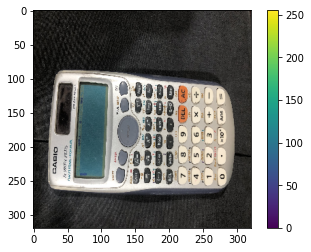

In [ ]:
plt.figure()
plt.imshow(train_images[250])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

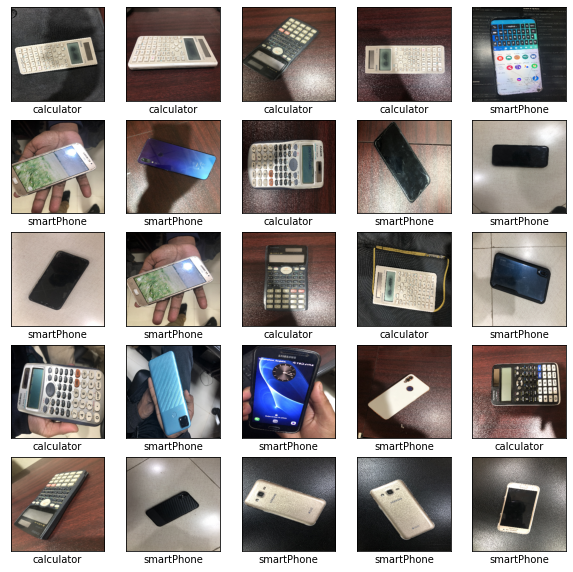

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
#     tf.keras.layers.Flatten(input_shape=(320, 320,3)),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(320, 320, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
8/8 [==============================] - 28s 3s/step - loss: 0.8615 - accuracy: 0.6339
Epoch 2/10
8/8 [==============================] - 29s 4s/step - loss: 0.6281 - accuracy: 0.6732
Epoch 3/10
8/8 [==============================] - 26s 3s/step - loss: 0.5774 - accuracy: 0.6890
Epoch 4/10
8/8 [==============================] - 26s 3s/step - loss: 0.4285 - accuracy: 0.7402
Epoch 5/10
8/8 [==============================] - 26s 3s/step - loss: 0.3525 - accuracy: 0.8504
Epoch 6/10
8/8 [==============================] - 26s 3s/step - loss: 0.2615 - accuracy: 0.8937
Epoch 7/10
8/8 [==============================] - 26s 3s/step - loss: 0.2769 - accuracy: 0.8976
Epoch 8/10
8/8 [==============================] - 33s 4s/step - loss: 0.2533 - accuracy: 0.8976
Epoch 9/10
8/8 [==============================] - 28s 4s/step - loss: 0.1866 - accuracy: 0.9173
Epoch 10/10
8/8 [==============================] - 26s 3s/step - loss: 0.1433 - accuracy: 0.9567


In [ ]:
# probability_model = tf.keras.Sequential([model, 
#                                          tf.keras.layers.Softmax()])

In [ ]:
predictions = model.predict(test_images)

2/2 [==============================] - 2s 915ms/step


In [ ]:
test_labels.shape,predictions.shape

((64,), (64, 1))

In [ ]:
for i in range(10):
  print(test_labels[i],predictions[i][0])

1 0.99582267
1 0.9999641
1 0.99994045
1 0.9999926
1 1.0
0 0.1726545
1 0.989661
0 0.091998875
1 0.99995285
1 0.99998957


In [ ]:
np.argmax(predictions[0])

0

In [ ]:
test_labels[0]

1

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = int(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array || 1),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

SyntaxError: ignored

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
test_images[0].shape

In [ ]:
classes = {
    1:"smartPhone",
    0:"calculator"
}

In [ ]:
plt.figure(figsize=(20,20))
for ind in range(20,32):
  # test_labels[i],predictions[i][0]
  plt.subplot(5,3,ind-19)
  plt.imshow(test_images[ind])
  val = np.round_(predictions[ind][0])
  # print(predictions[0][i])
  plt.title(f"{classes[val]},{predictions[ind][0]}",fontsize=15)
plt.savefig("Binary Classification.jpeg")

In [ ]:
predictions[5][0]

In [ ]:
predictions